This follows Elliot's idea for a contrast:

> **proposal 1**
> 
> Two class (e.g., CorrectStop vs. CorrectGo)
> 
> Leave-One-Out classifier...
> 
> Neural similarity of a subject to the group with a Stop vs. Go contrast might actually be indicative of performance.
> 
> subjects will naturally differ across the task as to how much their average signal responds to that, and the ones with better response might have better response inhibition.

So there are a couple of steps here...

1. iterate through subjects, holding out one at a time, and do the following steps.
2. Train a classifier across all the training subjects, classifying Stop vs. Go. We can start with the beta averages since those have done so well.
3. Use that classifier as a 'neural signature' to measure Stop. No real need to go to the betaseries--just see the extent to which each subject's Stop response matches the group's.
    - DASA: How about instead of this, we use the classifier as a classifier to do LOOCV, and measure the confidence of classifying go vs. stop for each subject rather than trying to use the classifier as a neural signature.
4. After you've iterated through all subjects, you have a measure of response inhibition for each subject. See if that regresses onto SST_SSRT or any of our other measures of response inhibition.




As a first pass, we can simplify this a bit just trying that single classifier on all subjects. This means that we're using train for tes tset but it will give us an initial measure of feasibility.

We probably do need to restrict to a specific brain region though, and that means retraining. - I think that prefrontal cortex mask we have works well.

## Data already generated

Can we use data already generated in `SST_inhibition_cv.ipynb`?

In [2]:
TESQ-ml-ns_on_nogo_go

NameError: name 'TESQ' is not defined

In [1]:
import pickle
from IPython.core.display import display, HTML, Markdown

In [2]:
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"

In [4]:
from nilearn import plotting
from nilearn.masking import compute_brain_mask
import nltools as nlt



/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [5]:
background_img = nlt.Brain_Data('/projects/sanlab/shared/spm12/canonical/MNI152_T1_1mm_brain.nii').to_nifti()

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


Not quite--we need a PFC mask I think. But we can use the script already written to do that.

## Setup

In [6]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
from dev_wtp_io_utils import *
import gc
import nibabel as nib

from os import path



python initialized for apply_loocv_and_save
cpus available; cpus to use:
28 25
28


## 2-class classification with PFC mask

In [7]:


nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"
test_train_df = pd.read_csv(train_test_markers_filepath)

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")


dataset_name = 'conditions'

from nilearn.decoding import DecoderRegressor, Decoder

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'
# HRF 2s

#get a PFC mask
pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)

(8, 238955)
2


In [8]:

def condition_resp_trans_func(X):
    return(X.condition_label)


In [9]:
brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_84subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_58subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

In [10]:
#set vars for the function

#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_40subs_twoclasses_pfcmask_repeat1.pkl"
results_filepath=ml_data_folderpath + "/SST/train_test_results_replication_" + dataset_name + "_84subs_twoclasses_pfcmask.pkl"
#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_58subs_twoclasses_pfcmask_repeat1.pkl"

def decoderConstructor(*args, **kwargs):
    return(Decoder(scoring='accuracy',verbose=0, *args, **kwargs))

In [11]:
from analyze_results import *

### PFC (repeated)

Repeat the PFC analysis above using a more automated pipeline that can be re-applied to other masks.

In [12]:

dataset_name = 'conditions'


brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_84subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

#set vars for the function
results_filepath=ml_data_folderpath + "/SST/train_test_results_replication_" + dataset_name + "_84subs_twoclasses_pfcmask.pkl"

def decoderConstructor(*args, **kwargs):
    return(Decoder(scoring='accuracy',verbose=0, *args, **kwargs))

pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)
relevant_mask = pfc_mask



(8, 238955)
2


In [13]:
raw_data=pickle.load(open(brain_data_filepath,'rb'))

In [14]:
raw_data.X

,condition_index,condition_label,raw_beta_description,beta,subject,wave
0,0,CorrectGo,spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1),beta_0001.nii,DEV005,1
1,1,CorrectStop,spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1),beta_0002.nii,DEV005,1
0,0,CorrectGo,spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1),beta_0001.nii,DEV006,1
1,1,CorrectStop,spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1),beta_0002.nii,DEV006,1
0,0,CorrectGo,spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1),beta_0001.nii,DEV010,1
...,...,...,...,...,...,...
1,1,CorrectStop,spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1),beta_0002.nii,DEV216,1
0,0,CorrectGo,spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1),beta_0001.nii,DEV217,1
1,1,CorrectStop,spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1),beta_0002.nii,DEV217,1
0,0,CorrectGo,spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1),beta_0001.nii,DEV218,1


/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_replication_conditions_84subs_twoclasses_pfcmask.pkl
0.8641975308641975


### correct_stop_ns

### correct_go_ns

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_replication_conditions_84subs_twoclasses_pfcmask.pkl
plotting signatures


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


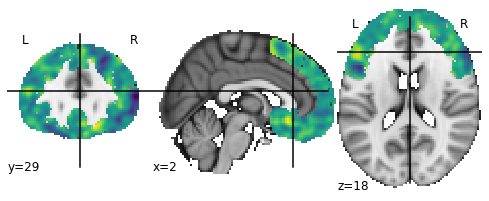

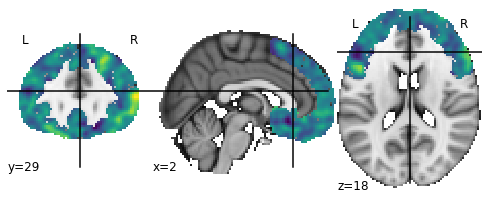

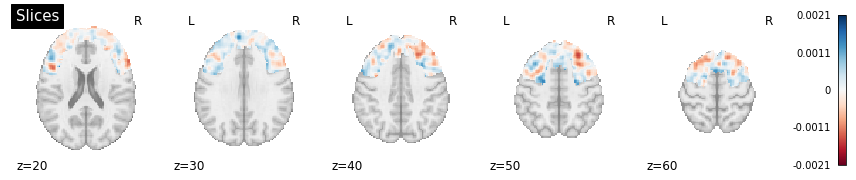

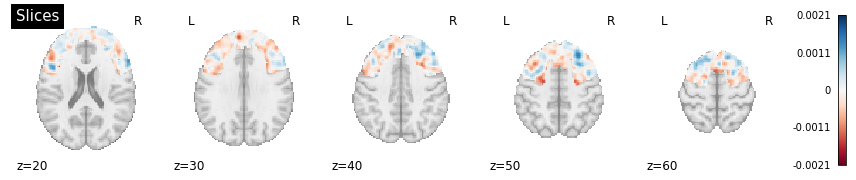

loading data
applying mask
getting similarity 1
getting similarity 2
creating histograms


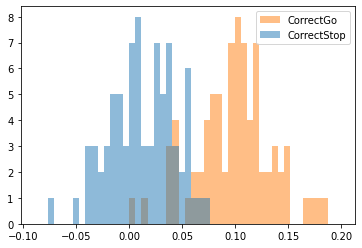

,CG_similarity,CS_similarity
condition_label,,
CorrectGo,0.103523,-0.103523
CorrectStop,0.010555,-0.010555


### CS_trials_CS_similarity

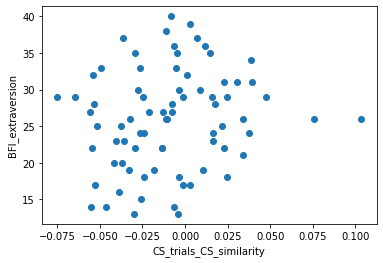

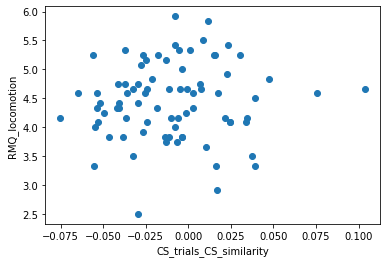

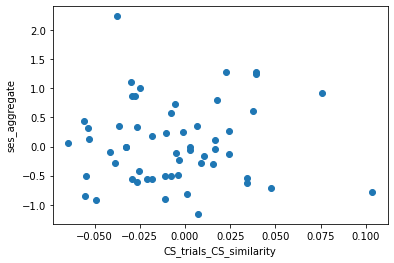

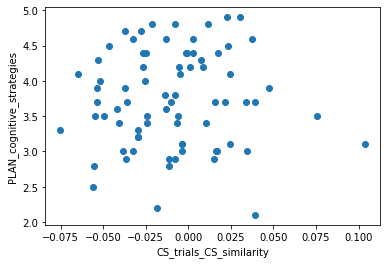

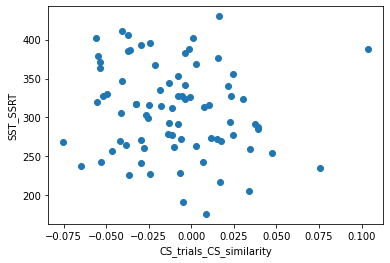

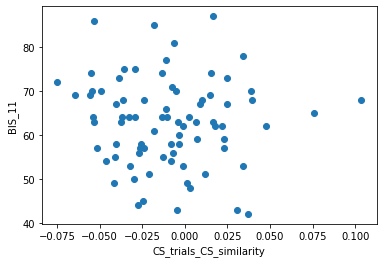

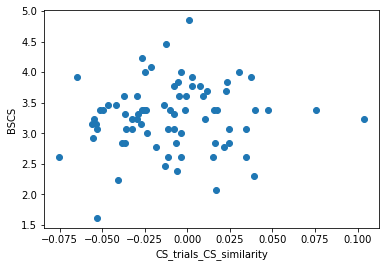

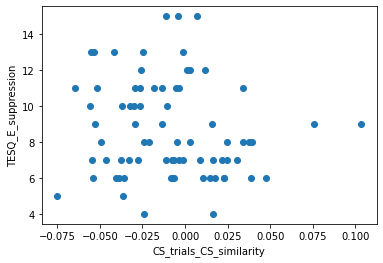

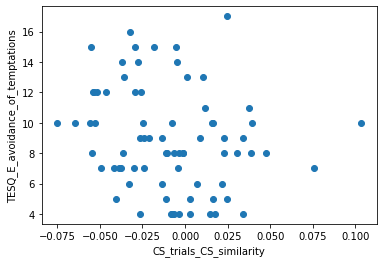

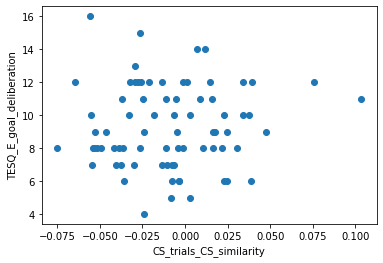

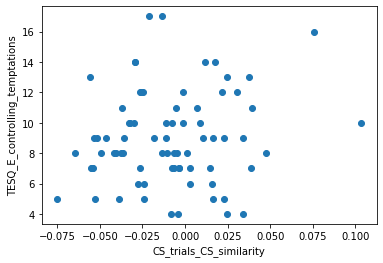

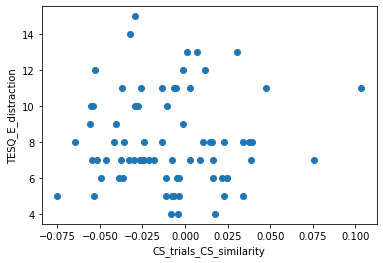

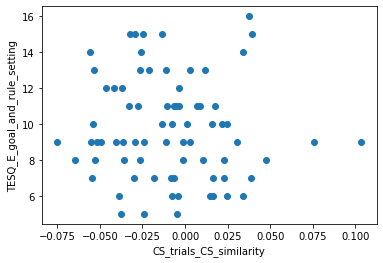

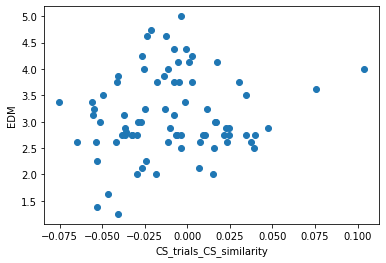

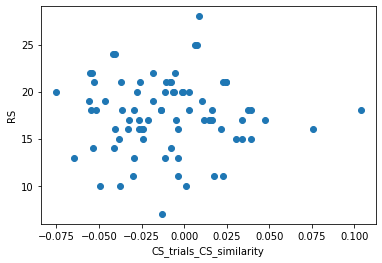

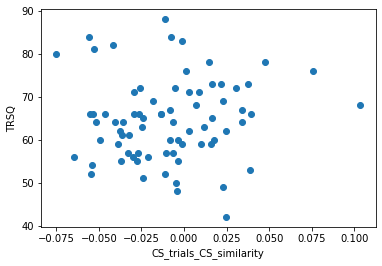

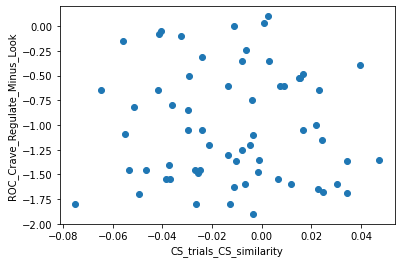

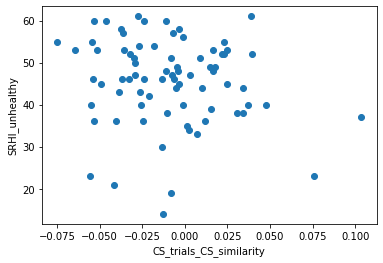

### CG_trials_CG_similarity

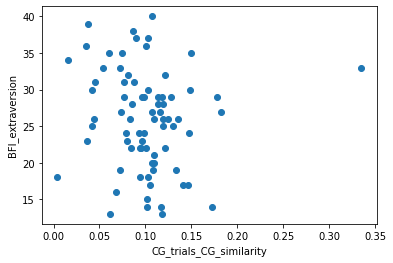

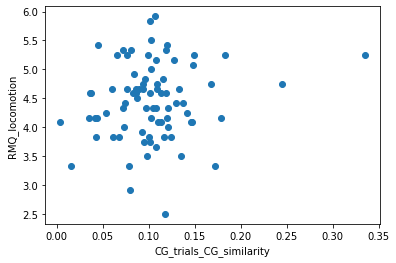

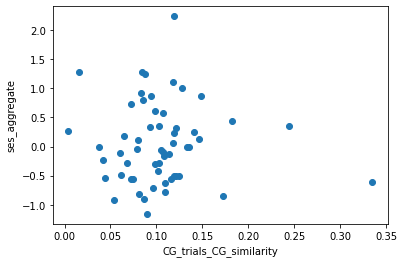

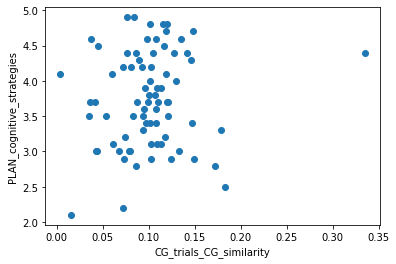

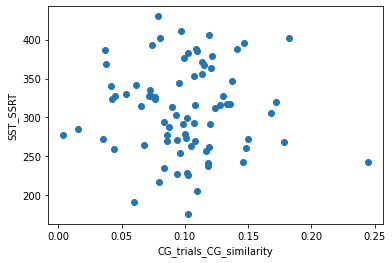

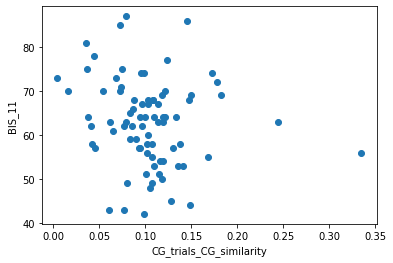

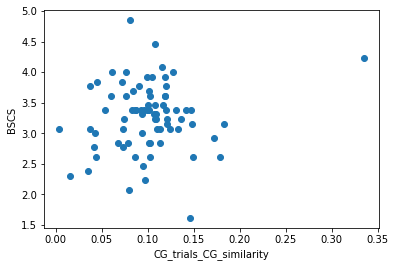

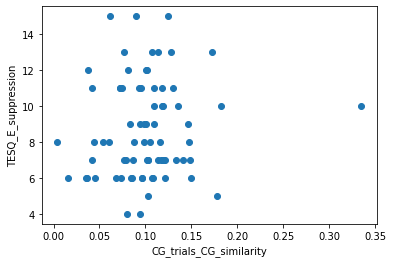

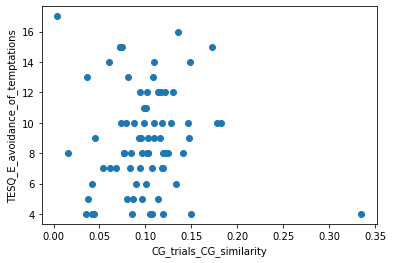

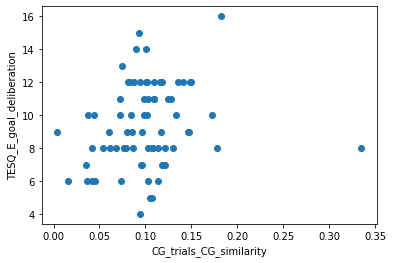

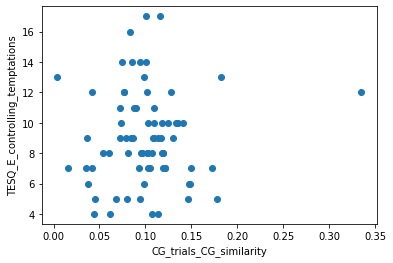

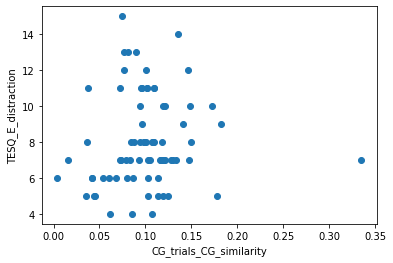

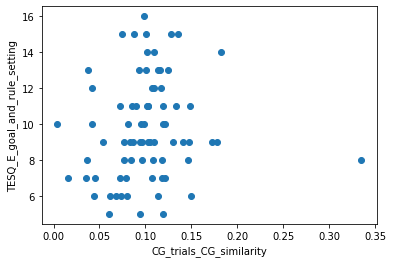

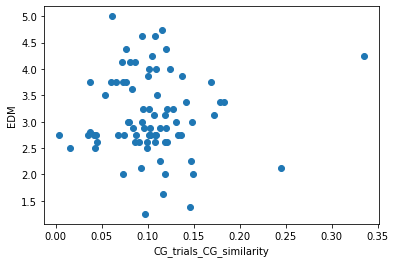

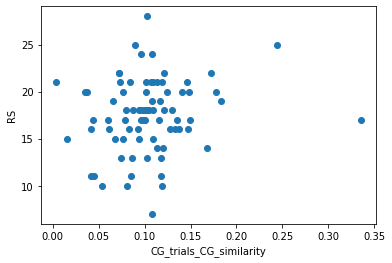

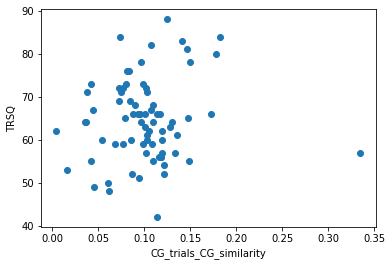

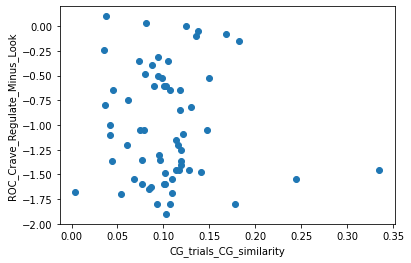

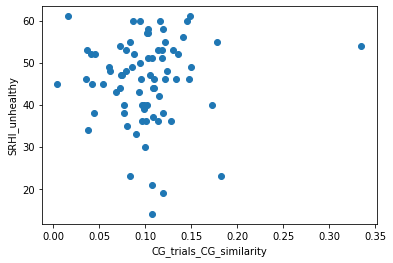

In [15]:
if path.exists(results_filepath) is False:
    apply_loocv_and_save(
        results_filepath = results_filepath,
        brain_data_filepath = brain_data_filepath,
        train_test_markers_filepath = train_test_markers_filepath,
#        subjs_to_use = 60,
        decoderConstructor = decoderConstructor,
        response_transform_func=condition_resp_trans_func,
        mask=relevant_mask
    )
    
    

print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

results[3]

correct_stop_ns=results[3]['CorrectStop']
display(Markdown("### correct_stop_ns"))
plotting.plot_img(correct_stop_ns,threshold='auto',bg_img=background_img)

correct_go_ns=results[3]['CorrectGo']
display(Markdown("### correct_go_ns"))
plotting.plot_img(correct_go_ns,threshold='auto',bg_img=background_img)

print(results_filepath,flush=True)

print("plotting signatures")

plot_stat_maps(correct_stop_ns,correct_go_ns)

print("loading data")

bd=get_bd(brain_data_filepath,correct_stop_ns,correct_go_ns,relevant_mask,'CG_similarity','CS_similarity')

create_histogram(bd,similarity1 = 'CG_similarity',similarity2 = 'CS_similarity',condition1 = 'CorrectStop',condition2='CorrectGo')

ind_div_combined = get_ind_div_for_sst(bd,ml_data_folderpath)

for neural_var in ['CS_trials_CS_similarity','CG_trials_CG_similarity']:
    display(Markdown("### " + neural_var))
    for correlate in ['BFI_extraversion','RMQ_locomotion','ses_aggregate','PLAN_cognitive_strategies','SST_SSRT','BIS_11','BSCS','TESQ_E_suppression', 'TESQ_E_avoidance_of_temptations', 
                      'TESQ_E_goal_deliberation', 'TESQ_E_controlling_temptations', 'TESQ_E_distraction', 'TESQ_E_goal_and_rule_setting',
                     'EDM','RS','TRSQ','ROC_Crave_Regulate_Minus_Look','SRHI_unhealthy']:
        visualize_corr(neural_var,correlate,ind_div_combined)
        

### whole brain

In [16]:

dataset_name = 'conditions'


In [17]:
brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_84subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

#set vars for the function

#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_40subs_twoclasses_pfcmask_repeat1.pkl"
results_filepath=ml_data_folderpath + "/SST/train_test_results_replication_" + dataset_name + "_84subs_twoclasses_wholebrain.pkl"
#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_58subs_twoclasses_pfcmask_repeat1.pkl"

def decoderConstructor(*args, **kwargs):
    return(Decoder(scoring='accuracy',verbose=0, *args, **kwargs))


relevant_mask = None

In [18]:
if path.exists(results_filepath) is False:
    apply_loocv_and_save(
        results_filepath = results_filepath,
        brain_data_filepath = brain_data_filepath,
        train_test_markers_filepath = train_test_markers_filepath,
#        subjs_to_use = 60,
        decoderConstructor = decoderConstructor,
        response_transform_func=condition_resp_trans_func
    )

checked for intersection and no intersection between the brain data and the subjects was found.
there were 55 subjects overlapping between the subjects marked for train data and the training dump file itself.
test_train_set: 9549
pkl_file: 168
brain_data_filepath: 152
train_test_markers_filepath: 141
response_transform_func: 136
sys: 72
clean: 60
Brain_Data_allsubs: 48
subjs_to_use: 16


/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml/apply_loocv_and_save.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brain_Data_allsubs.Y[Brain_Data_allsubs.Y=='NULL']=None


162
162


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/image.py:1106: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


starting LeaveOneOut
new decoder parameters:
{'cv': GroupKFold(n_splits=3), 'estimator': 'svc', 'high_pass': None, 'low_pass': None, 'mask': None, 'mask_strategy': 'background', 'memory': None, 'memory_level': 0, 'n_jobs': 25, 'param_grid': None, 'scoring': 'accuracy', 'screening_percentile': 20, 'smoothing_fwhm': None, 'standardize': True, 't_r': None, 'target_affine': None, 'target_shape': None, 'verbose': 0}
finished preprocessing
Groups are the same.
fold 1 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV058']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. predicting. test score was:. 1.0
fold 2 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV169']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 3 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV186']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 4 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV035']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 5 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV171']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 6 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV064']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 7 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV020']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 8 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV157']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 9 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV030']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 10 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV043']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 11 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV164']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 12 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV077']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 13 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV087']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 14 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV026']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 15 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV074']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 16 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV029']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 17 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV215']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 18 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV067']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 19 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV018']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 20 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV084']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 21 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV055']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 0.0
fold 22 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV197']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 23 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV027']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 24 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV041']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 25 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV011']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 26 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV107']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 27 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV060']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 28 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV145']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 29 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV052']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 30 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV046']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 31 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV062']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 32 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV097']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 33 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV057']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 34 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV010']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 35 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV177']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 36 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV085']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 37 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV036']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 38 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV173']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 39 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV076']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 0.0
fold 40 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV039']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 41 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV048']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 42 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV053']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 43 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV013']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 44 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV089']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 45 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV016']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 46 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV022']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 47 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV059']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 48 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV069']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 49 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV206']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 50 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV141']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 51 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV079']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 52 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV040']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 53 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV083']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 54 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV086']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 55 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV014']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 56 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV047']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 57 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV159']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 58 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV071']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 0.0
fold 59 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV019']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 60 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV051']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 61 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV023']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 62 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV105']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 63 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV034']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 64 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV021']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 65 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV217']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 66 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV042']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 67 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV216']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 68 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV218']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 69 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV073']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 70 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV158']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 71 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV005']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 0.0
fold 72 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV049']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 73 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV015']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 74 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV024']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 75 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV135']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 76 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV006']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 77 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV068']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 0.0
fold 78 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV028']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 79 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV050']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 80 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV017']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
fold 81 of 81
In order to test on a training group of 80 items, holding out the following subjects:['DEV056']. prepping fold data.... fitting.... 1.3 GiB. trying decoder 1 of 1. 

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


predicting. test score was:. 1.0
1.0
1.0
running one more time on whole dataset for beta map


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/decoding/decoder.py:141: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn('Use a custom estimator at your own risk '


finished learning
saved.


/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_replication_conditions_84subs_twoclasses_wholebrain.pkl
0.9382716049382716


### correct_stop_ns

### correct_go_ns

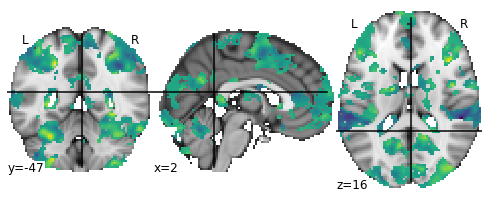

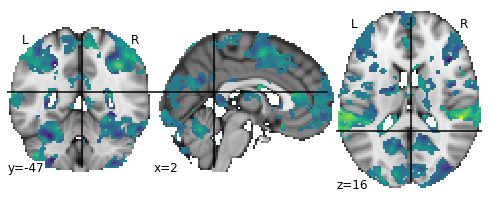

In [19]:

print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

results[3]

correct_stop_ns=results[3]['CorrectStop']
display(Markdown("### correct_stop_ns"))
plotting.plot_img(correct_stop_ns,threshold='auto',bg_img=background_img)

correct_go_ns=results[3]['CorrectGo']
display(Markdown("### correct_go_ns"))
plotting.plot_img(correct_go_ns,threshold='auto',bg_img=background_img)

In [20]:
from analyze_results import *

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_replication_conditions_84subs_twoclasses_wholebrain.pkl
plotting signatures


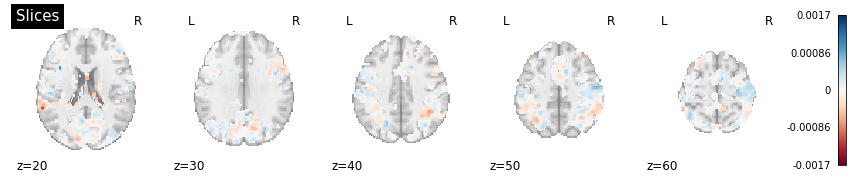

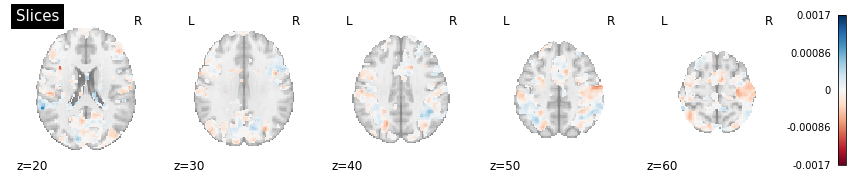

loading data
applying mask
getting similarity 1
getting similarity 2
creating histograms


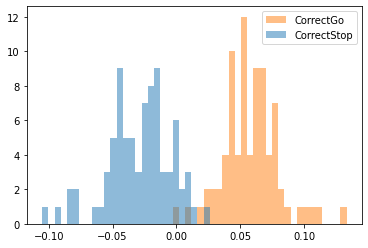

,CG_similarity,CS_similarity
condition_label,,
CorrectGo,0.059678,-0.059678
CorrectStop,-0.029212,0.029212


### CS_trials_CS_similarity

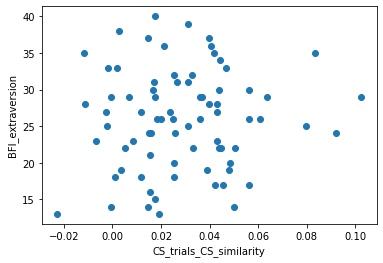

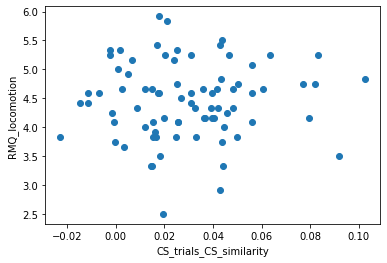

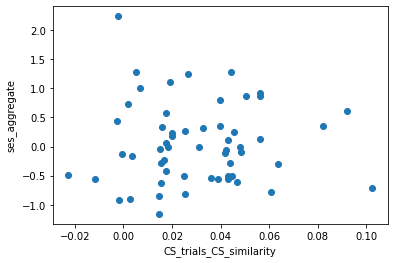

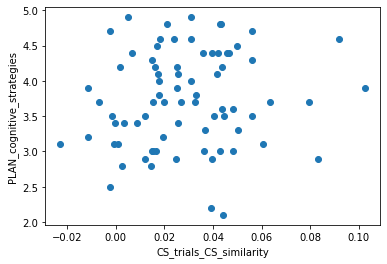

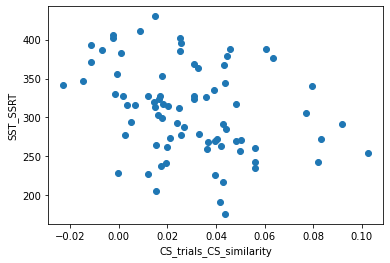

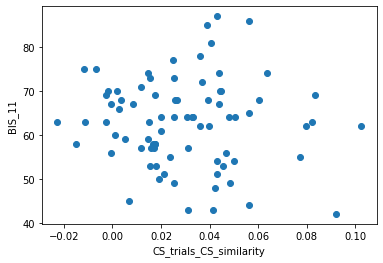

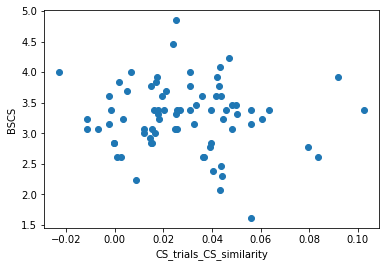

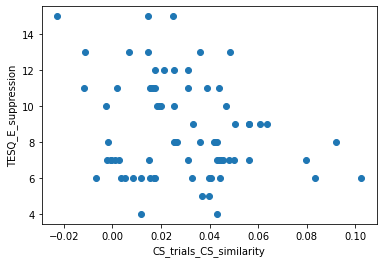

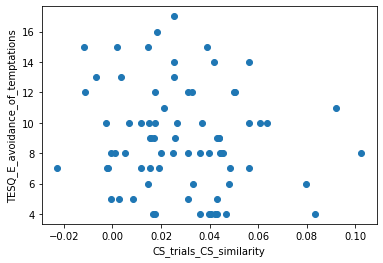

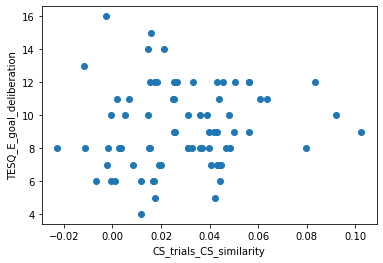

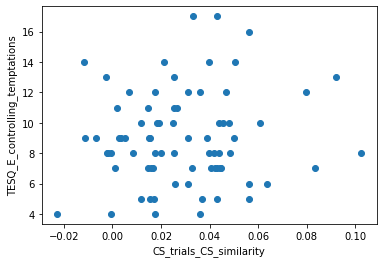

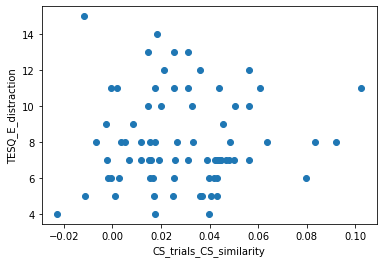

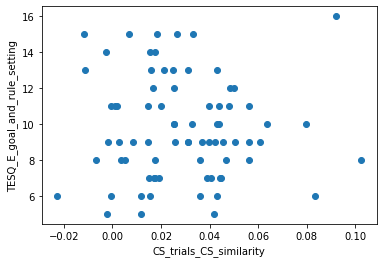

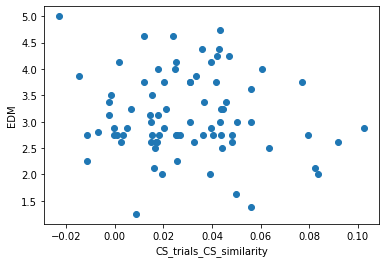

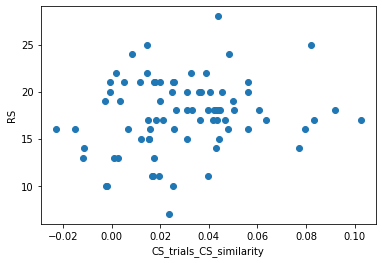

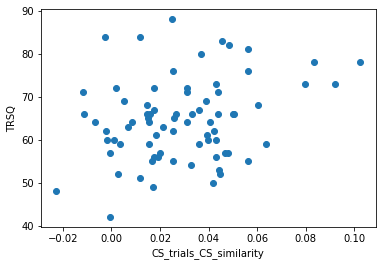

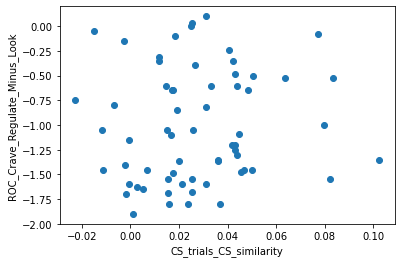

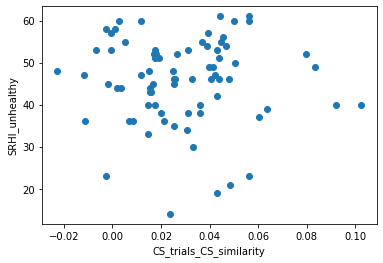

### CG_trials_CG_similarity

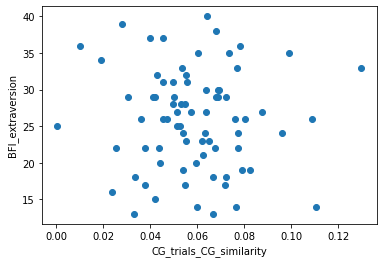

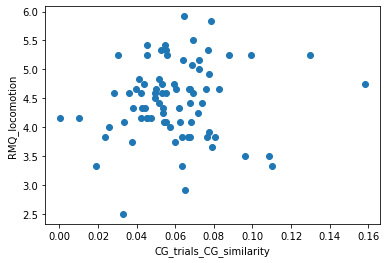

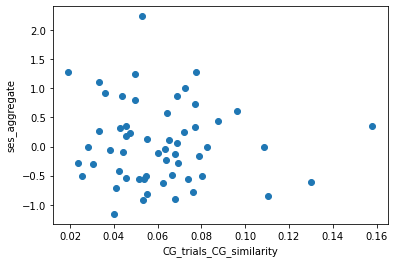

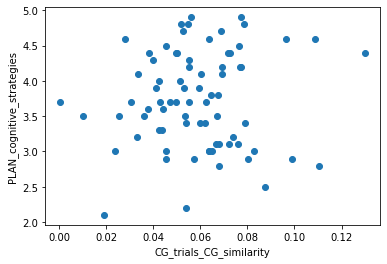

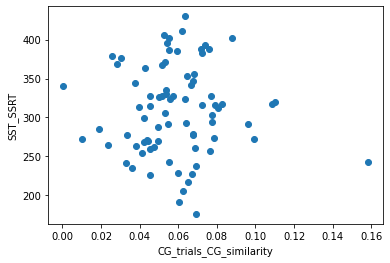

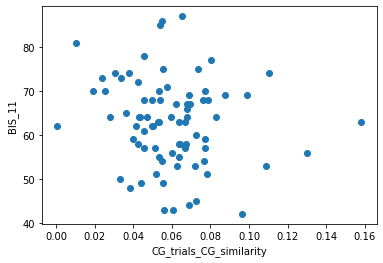

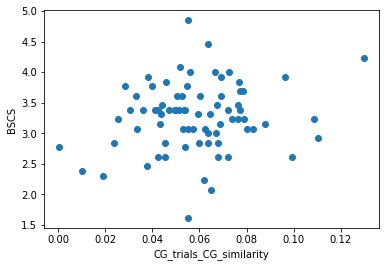

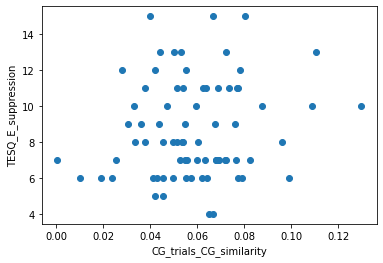

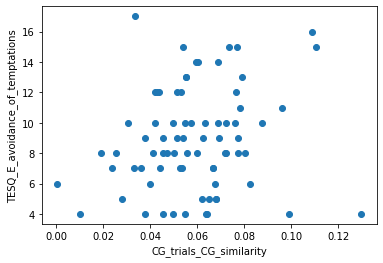

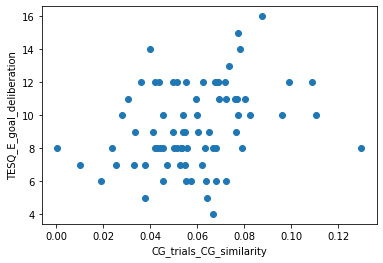

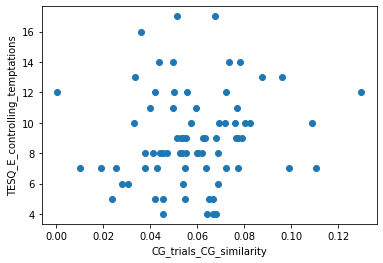

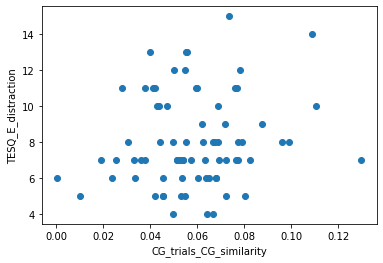

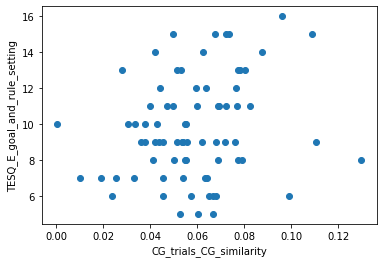

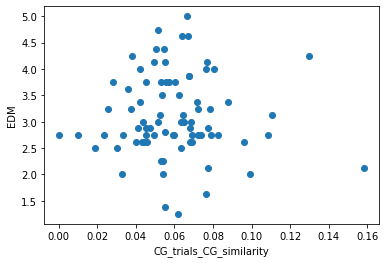

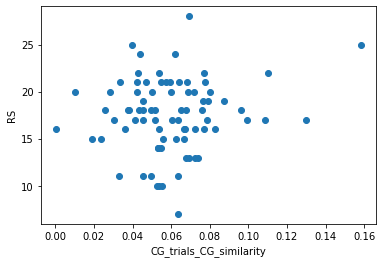

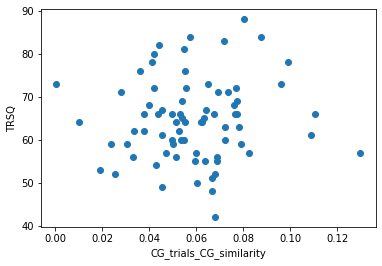

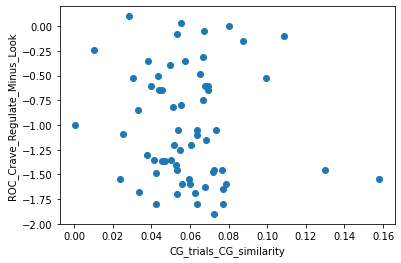

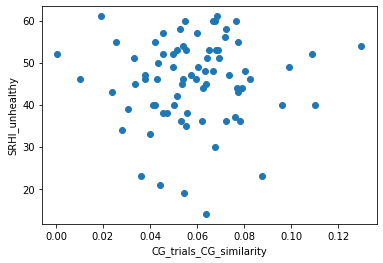

In [21]:
print(results_filepath,flush=True)

print("plotting signatures")

plot_stat_maps(correct_stop_ns,correct_go_ns)

print("loading data")

bd=get_bd(brain_data_filepath,correct_stop_ns,correct_go_ns,relevant_mask,'CG_similarity','CS_similarity')

create_histogram(bd,similarity1 = 'CG_similarity',similarity2 = 'CS_similarity',condition1 = 'CorrectStop',condition2='CorrectGo')

ind_div_combined = get_ind_div_for_sst(bd,ml_data_folderpath)

for neural_var in ['CS_trials_CS_similarity','CG_trials_CG_similarity']:
    display(Markdown("### " + neural_var))
    for correlate in ['BFI_extraversion','RMQ_locomotion','ses_aggregate','PLAN_cognitive_strategies','SST_SSRT','BIS_11','BSCS','TESQ_E_suppression', 'TESQ_E_avoidance_of_temptations', 
                      'TESQ_E_goal_deliberation', 'TESQ_E_controlling_temptations', 'TESQ_E_distraction', 'TESQ_E_goal_and_rule_setting',
                     'EDM','RS','TRSQ','ROC_Crave_Regulate_Minus_Look','SRHI_unhealthy']:
        visualize_corr(neural_var,correlate,ind_div_combined)
        

In [ ]:
#for neurosynth_mask_name in ['response inhibition','planning','inhibition','goal']:
    
def do_complete_analysis_for_mask(neurosynth_mask_name):
    display(Markdown("## " + neurosynth_mask_name))
    neurosynth_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/' + neurosynth_mask_name + '_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()
    relevant_mask = neurosynth_mask
    
    dataset_name = 'conditions'


    brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_84subs_correct_cond.pkl'
    #brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

    #set vars for the function
    results_filepath=ml_data_folderpath + "/SST/train_test_results_replication_" + dataset_name + "_84subs_twoclasses_" + neurosynth_mask_name + ".pkl"

    def decoderConstructor(*args, **kwargs):
        return(Decoder(scoring='accuracy',verbose=0, *args, **kwargs))


    
    if path.exists(results_filepath) is False:
        apply_loocv_and_save(
            results_filepath = results_filepath,
            brain_data_filepath = brain_data_filepath,
            train_test_markers_filepath = train_test_markers_filepath,
    #        subjs_to_use = 60,
            decoderConstructor = decoderConstructor,
            response_transform_func=condition_resp_trans_func,
            mask=relevant_mask
        )
    
    

    print(results_filepath)
    results=pickle.load(open(results_filepath,'rb'))

    print(np.mean(results[0]))

    results[3]

    correct_stop_ns=results[3]['CorrectStop']
    display(Markdown("### correct_stop_ns"))
    plotting.plot_img(correct_stop_ns,threshold='auto',bg_img=background_img)

    correct_go_ns=results[3]['CorrectGo']
    display(Markdown("### correct_go_ns"))
    plotting.plot_img(correct_go_ns,threshold='auto',bg_img=background_img)

    print(results_filepath,flush=True)

    print("plotting signatures")

    plot_stat_maps(correct_stop_ns,correct_go_ns)

    print("loading data")

    bd=get_bd(brain_data_filepath,correct_stop_ns,correct_go_ns,relevant_mask,'CG_similarity','CS_similarity')

    create_histogram(bd,similarity1 = 'CG_similarity',similarity2 = 'CS_similarity',condition1 = 'CorrectStop',condition2='CorrectGo')

    ind_div_combined = get_ind_div_for_sst(bd,ml_data_folderpath)

    for neural_var in ['CS_trials_CS_similarity','CG_trials_CG_similarity']:
        display(Markdown("### " + neural_var))
        for correlate in ['BFI_extraversion','RMQ_locomotion','ses_aggregate','PLAN_cognitive_strategies','SST_SSRT','BIS_11','BSCS','TESQ_E_suppression', 'TESQ_E_avoidance_of_temptations', 
                          'TESQ_E_goal_deliberation', 'TESQ_E_controlling_temptations', 'TESQ_E_distraction', 'TESQ_E_goal_and_rule_setting',
                         'EDM','RS','TRSQ','ROC_Crave_Regulate_Minus_Look','SRHI_unhealthy']:
            visualize_corr(neural_var,correlate,ind_div_combined)





In [ ]:
do_complete_analysis_for_mask('response inhibition')

In [ ]:
do_complete_analysis_for_mask('planning')

In [ ]:
do_complete_analysis_for_mask('inhibition')

In [ ]:
do_complete_analysis_for_mask('goal')